##Análise e manipulação dos dados

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ic/Dados limpos/resultados/complete_atributes_with_diag.csv')
df = df.iloc[:,1:]
df.head()

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,NaN,NaN,NaN,NaN
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,NaN,NaN,NaN,NaN
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 359 entries, Unnamed: 0.1 to rs17047502_2
dtypes: float64(7), int64(350), object(2)
memory usage: 2.1+ MB


**Lembrete**  
AD $\rightarrow$ Alzheimer Desease  
CN $\rightarrow$  Cognitively Normal  
MCI $\rightarrow$ Mild Cognitive Impairment

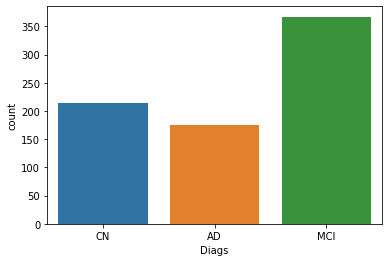

In [4]:
sns.countplot(x='Diags',data=df)

In [5]:
df.iloc[533:534,:] #linha sem diagnostico

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
533,100_S_1226,NaN,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0


In [6]:
df.drop(labels=533,inplace=True)
df.fillna(0, inplace = True)
df

,Unnamed: 0.1,Diags,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
0,002_S_0295,CN,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
1,002_S_0413,CN,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
2,002_S_0559,CN,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
3,002_S_0619,AD,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0
4,002_S_0685,CN,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,941_S_1202,CN,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
753,941_S_1203,CN,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
754,941_S_1295,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0.0,0.0,0.0,0.0
755,941_S_1311,MCI,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.0,0.0,0.0,0.0


In [7]:
y = df['Diags']
y = y.str.get_dummies()

In [8]:
y

,AD,CN,MCI
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
752,0,1,0
753,0,1,0
754,0,0,1
755,0,0,1


In [9]:
X = df.iloc[:,2:] #apenas os atributos

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.head(3)

,rs10127904_1,rs10127904_2,rs10127904_3,rs10194375_1,rs10194375_2,rs10194375_3,rs10200967_1,rs10200967_2,rs10200967_3,rs10419707_1,rs10419707_2,rs10419707_3,rs10501602_1,rs10501602_2,rs10501602_3,rs10501604_1,rs10501604_2,rs10501604_3,rs10501608_1,rs10501608_2,rs10501608_3,rs10503814_2,rs10503814_3,rs10779339_1,rs10779339_2,rs10779339_3,rs10792820_1,rs10792820_2,rs10792820_3,rs10792821_1,rs10792821_2,rs10792821_3,rs10898427_1,rs10898427_2,rs10898427_3,rs10948367_1,rs10948367_2,rs10948367_3,rs11084060_1,rs11084060_2,...,rs7938033_2,rs7938033_3,rs873270_1,rs873270_2,rs873270_3,rs880436_1,rs880436_2,rs880436_3,rs9296559_1,rs9296559_2,rs9296559_3,rs9296562_1,rs9296562_2,rs9296562_3,rs9296568_1,rs9296568_2,rs9296568_3,rs9314349_1,rs9314349_2,rs9314349_3,rs934826_1,rs934826_2,rs934826_3,rs9349417_1,rs9349417_2,rs9349417_3,rs9395267_1,rs9395267_2,rs9395267_3,rs9395285_1,rs9395285_2,rs9395285_3,rs9473121_1,rs9473121_2,rs9473121_3,rs988337_1,rs10503814_1,rs11230195_3,rs12094477_3,rs17047502_2
744,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,0.0,0.0
33,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0.0,0.0,0.0,0.0
548,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0.0,0.0,0.0,0.0


In [12]:
y_train.head(3)

,AD,CN,MCI
744,0,0,1
33,1,0,0
548,1,0,0


In [13]:
y_train_AD = y_train['AD']
y_train_AD

744    0
33     1
548    1
117    0
653    0
      ..
152    1
550    0
352    0
192    0
448    0
Name: AD, Length: 567, dtype: int64

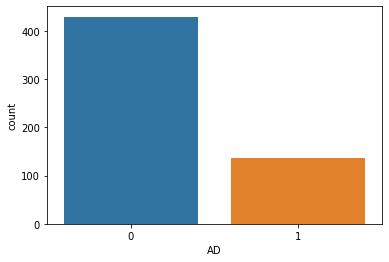

In [14]:
sns.countplot(x='AD',data=y_train)

## Regressão Logistica

In [15]:
lm = LogisticRegression()
lm.fit(X_train,y_train_AD)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_predict = lm.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [17]:
from sklearn.metrics import mean_squared_error
print("------------------------------------------------------")
print('Mean Squared Error:')
print(mean_squared_error(y_test['AD'],y_predict))
print("------------------------------------------------------")
print('Score (Acurácia): ')
print(lm.score(X_test,y_test['AD']) )


------------------------------------------------------
Mean Squared Error:
0.2804232804232804
------------------------------------------------------
Score (Acurácia): 
0.7195767195767195


## Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
cv = LogisticRegressionCV(cv = 5, scoring='roc_auc', n_jobs=-1,class_weight=.4)
cv.fit(X_train, y_train_AD)

LogisticRegressionCV(Cs=10, class_weight=0.4, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
print('Cross- Validation Scores: ')
print("------------------------------------------------------")
print('Mean Squared Error with CV:')
print(mean_squared_error(y_test['AD'],cv.predict(X_test)))
print("------------------------------------------------------")
print('Score (Acurácia) with CV: ')
print(cv.score(X_test,y_test['AD']) )

Cross- Validation Scores: 
------------------------------------------------------
Mean Squared Error with CV:
0.20105820105820105
------------------------------------------------------
Score (Acurácia) with CV: 
0.5397350993377483


In [23]:
y_score = cv.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
y_test['AD'].sum()/y_test['AD'].count()

0.20105820105820105

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_score = cv.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test['AD'], y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test['AD'], y_score))

roc_auc_score for Logistic Regression:  0.5397350993377483


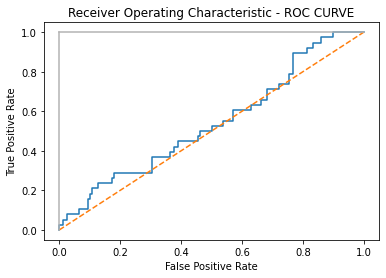

In [41]:
plt.title('Receiver Operating Characteristic - ROC CURVE')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()